In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def RMS(waveform, frame_length, hop_length):
    """
    计算音频信号的根均方值（RMS）。

    参数:
    waveform (np.ndarray): 输入音频信号，1维数组。
    frame_length (int): 每个帧的长度（样本数）。
    hop_length (int): 帧之间的跳步长度（样本数）。

    返回:
    np.ndarray: 每个帧的RMS值，1维数组。
    每个值表示对应帧的音频信号的均方根值。
    每个帧的RMS值计算方法：
    1. 对每个帧的音频信号进行平方操作。
    2. 计算平方后的信号的平均值。
    3. 对平均值取平方根。
    """
    pad_width = frame_length // 2
    waveform_padded = np.pad(waveform, (pad_width, pad_width), mode='reflect')

    # 计算帧数
    frame_num = 1 + int(np.floor((len(waveform_padded) - frame_length) / hop_length))

    # 初始化RMS值列表
    rms_values = []
    
    for t in range(frame_num):
        # 计算当前帧的起始和结束索引
        start_idx = t * hop_length
        end_idx = start_idx + frame_length

        # 确保不超出填充后数组的边界
        if end_idx <= len(waveform_padded):
            current_frame = waveform_padded[start_idx:end_idx]
            if len(current_frame) > 0: 
                # 计算当前帧的RMS值
                current_rms = np.sqrt(np.mean(current_frame**2))
                rms_values.append(current_rms)
        else:
            break
    
    return np.array(rms_values)


In [4]:
# 绘制幅值包络信息
def plot_RMS_envelope(waveform, waveform_RMS, sample_rate, hop_length):
    plt.figure(figsize=(12, 8))
    frame_scale = np.arange(0, len(waveform_RMS))
    time_scale = librosa.frames_to_time(frame_scale, hop_length=hop_length)
    librosa.display.waveshow(waveform, sr=sample_rate)
    plt.plot(time_scale, waveform_RMS, color='red')
    plt.title('RMS Envelope of Audio Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('RMS')
    plt.show()

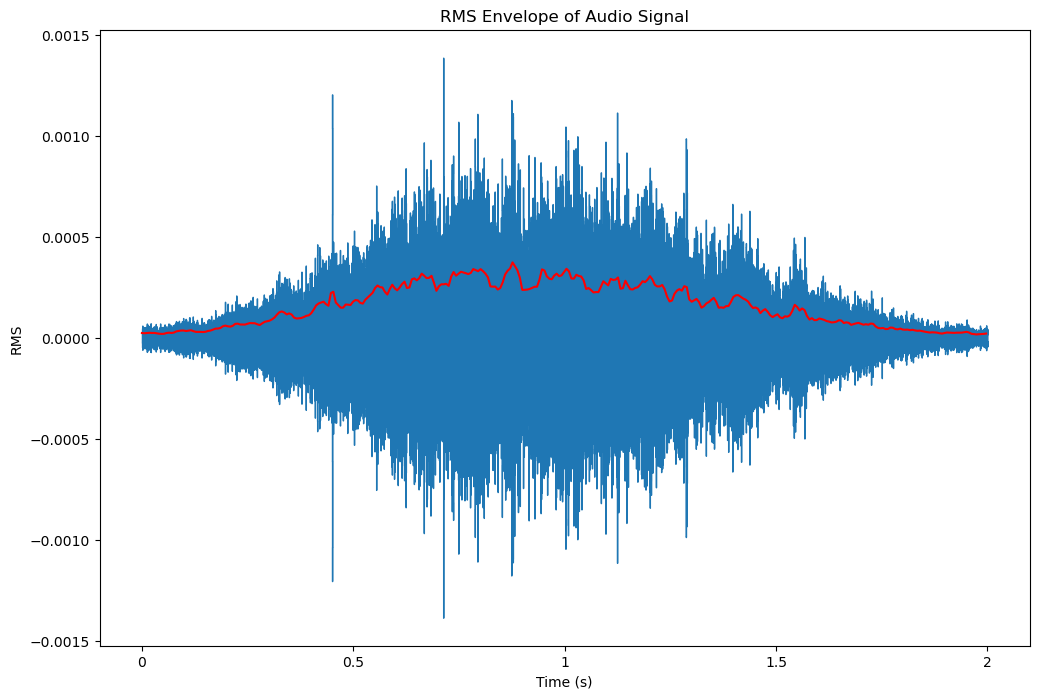

In [11]:
# 音频文件路径
audio_file = r'E:\数据集\ShipEar\data_preprocessing\3_Frame_Windows_2s_50%\6__10_07_13_marDeCangas_Entra_18.wav'

waveform, sample_rate = librosa.load(audio_file, sr=22050)

frame_length = 256
hop_length = 128

waveform_RMS = RMS(waveform, frame_length, hop_length)
plot_RMS_envelope(waveform, waveform_RMS, sample_rate, hop_length)

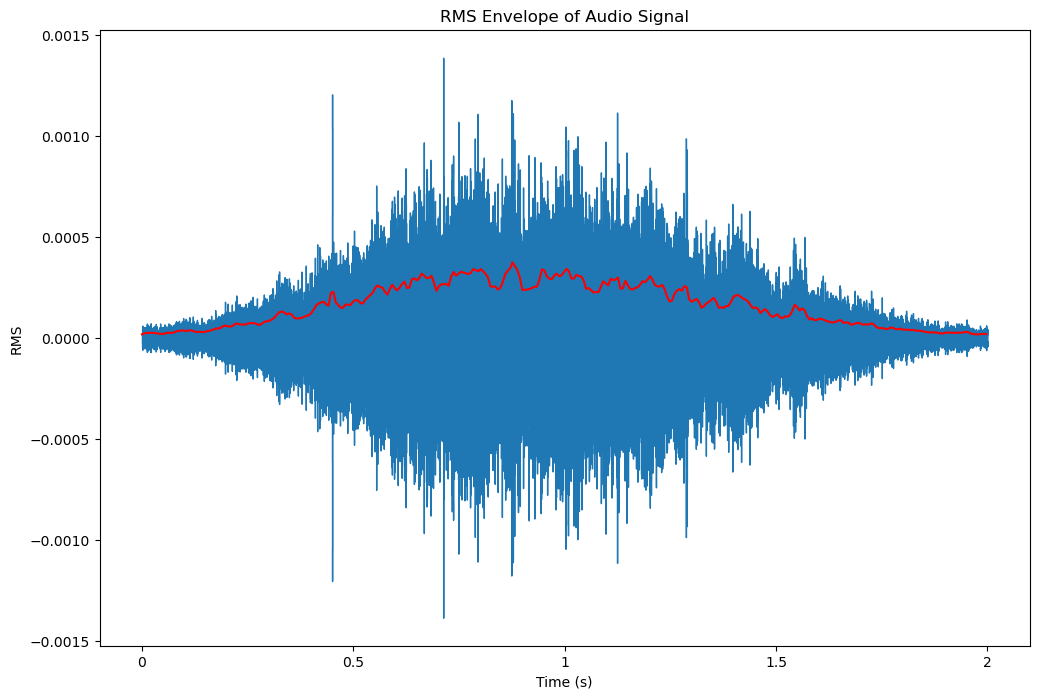

In [12]:
waveform_RMS_librosa = librosa.feature.rms(y=waveform, frame_length=frame_length, hop_length=hop_length)[0]
plot_RMS_envelope(waveform, waveform_RMS_librosa, sample_rate, hop_length)